In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1336)
random.seed(1336)

Text(0.5, 1.0, 'make_circles dataset')

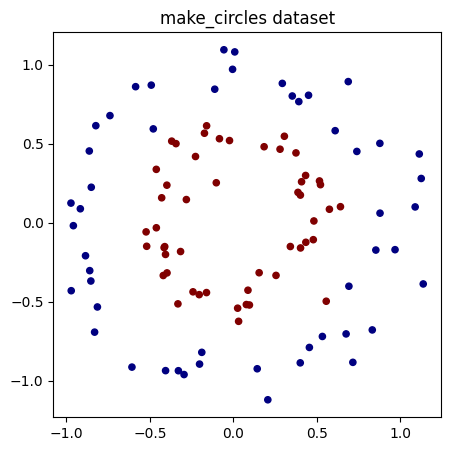

In [4]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# make dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5)

# make y be -1 or 1
y = y * 2 - 1

# visualize
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.title("make_circles dataset")

In [5]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

number of parameters 337


In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.077599500442529, grad=0) 0.48


In [7]:
# optimization
for k in range(50):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.077599500442529, accuracy 48.0%
step 1 loss 0.865906527106987, accuracy 65.0%
step 2 loss 0.7515437028712925, accuracy 78.0%
step 3 loss 0.619498753761055, accuracy 79.0%
step 4 loss 0.5491674859643967, accuracy 77.0%
step 5 loss 0.744721494323366, accuracy 71.0%
step 6 loss 0.5950217989490868, accuracy 70.0%
step 7 loss 0.8693280924961527, accuracy 54.0%
step 8 loss 1.111629332337621, accuracy 54.0%
step 9 loss 0.6176412601566272, accuracy 68.0%
step 10 loss 0.5580717696760342, accuracy 85.0%
step 11 loss 0.623724872861348, accuracy 68.0%
step 12 loss 0.8254882575903407, accuracy 60.0%
step 13 loss 0.4874611409298455, accuracy 78.0%
step 14 loss 0.49866804896929245, accuracy 78.0%
step 15 loss 0.7660333674530354, accuracy 63.0%
step 16 loss 0.648617811431125, accuracy 66.0%
step 17 loss 0.4754520348208274, accuracy 79.0%
step 18 loss 0.37484251039156624, accuracy 82.0%
step 19 loss 0.4449038990374358, accuracy 81.0%
step 20 loss 0.4597779056800683, accuracy 78.0%
step 21

(-2.121755787484557, 1.878244212515443)

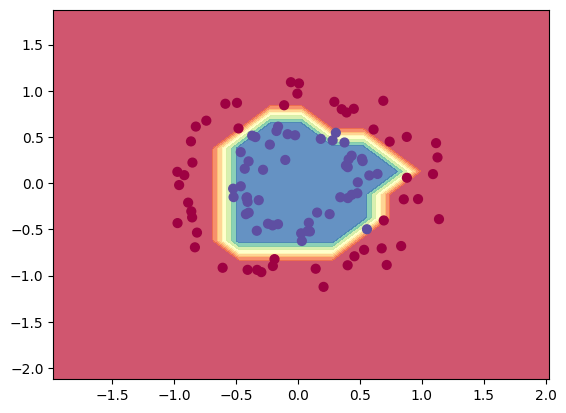

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())